In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
    
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)
url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto velho
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | emba
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | ucluelet
Processing Record 18 of Set 1 | marsa matruh
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | vao
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set

Processing Record 36 of Set 4 | narsaq
Processing Record 37 of Set 4 | kampot
Processing Record 38 of Set 4 | lluta
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | labuan
Processing Record 41 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | vanavara
Processing Record 44 of Set 4 | port hedland
Processing Record 45 of Set 4 | encarnacion
Processing Record 46 of Set 4 | kloulklubed
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | richards bay
Processing Record 50 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | mendi
Processing Record 4 of Set 5 | talaya
Processing Record 5 of Set 5 | amahai
Processing Record 6 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 7 of Set 5 | dharchula
Processin

Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | margate
Processing Record 28 of Set 8 | saint-gabriel
Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 31 of Set 8 | pascagoula
Processing Record 32 of Set 8 | grand gaube
Processing Record 33 of Set 8 | babstovo
Processing Record 34 of Set 8 | cristalina
Processing Record 35 of Set 8 | acapulco
Processing Record 36 of Set 8 | tarakan
Processing Record 37 of Set 8 | mandalgovi
Processing Record 38 of Set 8 | araouane
Processing Record 39 of Set 8 | santa rosa
Processing Record 40 of Set 8 | mosterhamn
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | tidore
City not found. Skipping...
Processing Record 43 of Set 8 | kaniama
Processing Record 44 of Set 8 | calbuco
Processing Record 45 of Set 8 | rock hill
Processing Record 46 of Set 8 | huilong
Processing Record 47 of Set 8 | villazon
Processing Record 48 of Set 8 |

Processing Record 12 of Set 12 | myaundzha
Processing Record 13 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 14 of Set 12 | naze
Processing Record 15 of Set 12 | banda aceh
Processing Record 16 of Set 12 | kutum
Processing Record 17 of Set 12 | kazachinskoye
Processing Record 18 of Set 12 | nchelenge
Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | leningradskiy
Processing Record 21 of Set 12 | rocha
Processing Record 22 of Set 12 | cleveland
Processing Record 23 of Set 12 | tucurui
Processing Record 24 of Set 12 | lanzhou
Processing Record 25 of Set 12 | cayenne
Processing Record 26 of Set 12 | yamada
Processing Record 27 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 28 of Set 12 | havoysund
Processing Record 29 of Set 12 | kibungo
Processing Record 30 of Set 12 | igarka
Processing Record 31 of Set 12 | fuerte
Processing Record 32 of Set 12 | sioux lookout
Processing Record 33 of Set 12 | shelbyville
Processi

In [9]:
city_data_count = len(city_data)
city_data_count

566

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Porto Velho,-8.7619,-63.9039,297.18,94,75,1.03,BR,2022-01-30 23:54:48
1,Khatanga,71.9667,102.5000,252.42,98,98,3.95,RU,2022-01-30 23:54:48
2,Tiksi,71.6872,128.8694,245.06,100,97,1.91,RU,2022-01-30 23:51:40
3,Cape Town,-33.9258,18.4232,294.88,78,0,0.89,ZA,2022-01-30 23:54:49
4,Port Elizabeth,-33.9180,25.5701,294.31,94,20,5.14,ZA,2022-01-30 23:54:50
5,Tuatapere,-46.1333,167.6833,294.72,65,37,2.20,NZ,2022-01-30 23:50:59
6,Chuy,-33.6971,-53.4616,294.80,78,13,6.32,UY,2022-01-30 23:54:50
7,Bengkulu,-3.8004,102.2655,297.51,88,97,2.16,ID,2022-01-30 23:54:51
8,Emba,48.8264,58.1442,269.19,96,100,6.08,KZ,2022-01-30 23:54:51
9,Hobart,-42.8794,147.3294,300.38,61,20,2.57,AU,2022-01-30 23:54:52


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
display (city_data_df)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Velho,BR,2022-01-30 23:54:48,-8.7619,-63.9039,297.18,94,75,1.03
1,Khatanga,RU,2022-01-30 23:54:48,71.9667,102.5000,252.42,98,98,3.95
2,Tiksi,RU,2022-01-30 23:51:40,71.6872,128.8694,245.06,100,97,1.91
3,Cape Town,ZA,2022-01-30 23:54:49,-33.9258,18.4232,294.88,78,0,0.89
4,Port Elizabeth,ZA,2022-01-30 23:54:50,-33.9180,25.5701,294.31,94,20,5.14
...,...,...,...,...,...,...,...,...,...
561,Tulsipur,NP,2022-01-31 00:11:01,28.1310,82.2973,281.81,81,0,1.88
562,Lakselv,NO,2022-01-31 00:11:01,70.0513,24.9718,258.05,92,59,1.03
563,Olden,NO,2022-01-31 00:11:02,61.8364,6.8064,271.48,88,100,2.90
564,Leshukonskoye,RU,2022-01-31 00:11:02,64.8989,45.7622,260.00,96,100,2.37


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

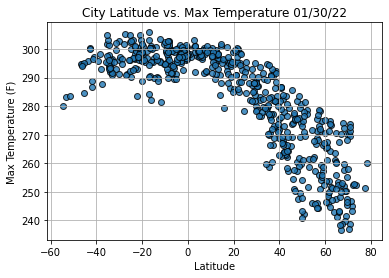

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

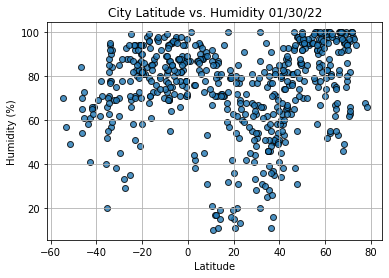

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

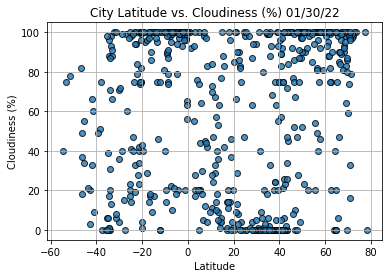

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

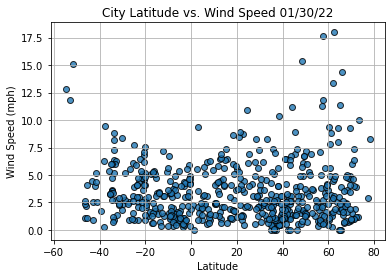

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Country                        AU
Date          2022-01-30 23:54:53
Lat                      -24.8667
Lng                      113.6333
Max Temp                   300.19
Humidity                       69
Cloudiness                     41
Wind Speed                   7.72
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Khatanga,RU,2022-01-30 23:54:48,71.9667,102.5000,252.42,98,98,3.95
2,Tiksi,RU,2022-01-30 23:51:40,71.6872,128.8694,245.06,100,97,1.91
8,Emba,KZ,2022-01-30 23:54:51,48.8264,58.1442,269.19,96,100,6.08
11,Thompson,CA,2022-01-30 23:52:36,55.7435,-97.8558,257.24,78,20,2.06
14,Ucluelet,CA,2022-01-30 23:54:54,48.9329,-125.5528,279.31,86,99,4.92
...,...,...,...,...,...,...,...,...,...
561,Tulsipur,NP,2022-01-31 00:11:01,28.1310,82.2973,281.81,81,0,1.88
562,Lakselv,NO,2022-01-31 00:11:01,70.0513,24.9718,258.05,92,59,1.03
563,Olden,NO,2022-01-31 00:11:02,61.8364,6.8064,271.48,88,100,2.90
564,Leshukonskoye,RU,2022-01-31 00:11:02,64.8989,45.7622,260.00,96,100,2.37


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Khatanga,RU,2022-01-30 23:54:48,71.9667,102.5000,252.42,98,98,3.95
2,Tiksi,RU,2022-01-30 23:51:40,71.6872,128.8694,245.06,100,97,1.91
8,Emba,KZ,2022-01-30 23:54:51,48.8264,58.1442,269.19,96,100,6.08
11,Thompson,CA,2022-01-30 23:52:36,55.7435,-97.8558,257.24,78,20,2.06
14,Ucluelet,CA,2022-01-30 23:54:54,48.9329,-125.5528,279.31,86,99,4.92


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

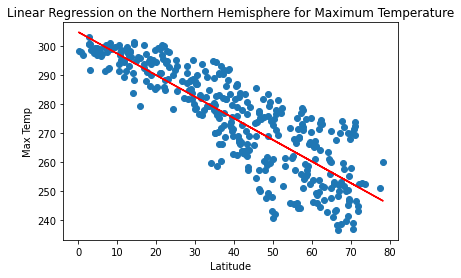

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

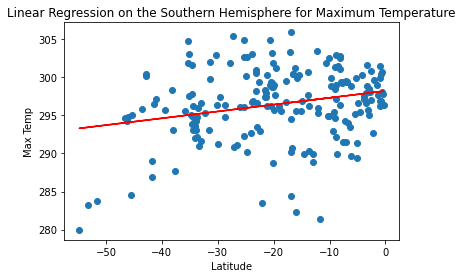

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

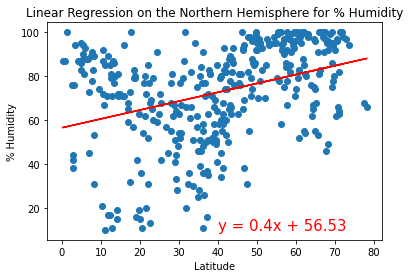

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

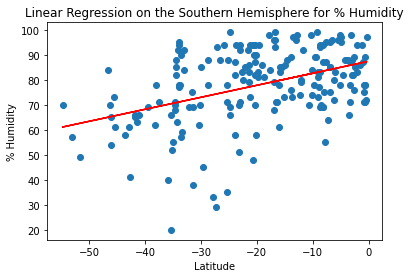

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

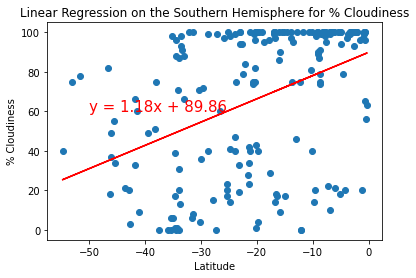

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

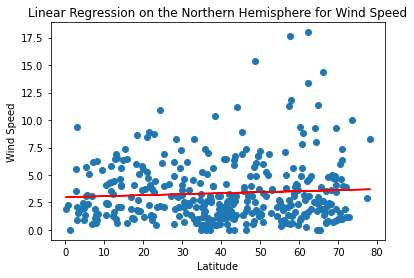

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

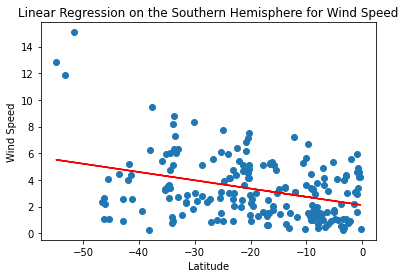

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))